<a href="https://colab.research.google.com/github/pkong0414/Deep-Learning-Projects/blob/master/Copy_of_clockAI_with_dropout_v0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing library

import keras
from keras.models import *
from keras.layers import *
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#use this when you use google colab only!
from google.colab import files, drive
import glob
import pandas as pd
import io
import numpy as np
import cv2
from PIL import Image
import pathlib


import tensorflow as tf



Using TensorFlow backend.


Created by: Patrick Kong, Cody Hawkings
                
    clockAI project:
    
    This clock ai would aim to use computervision in order to read a clock's time.
    It would be able to read digital and more importantly analog clocks.
    
    We will be using google colab for this project.

###Mounting Google Drive

In [2]:
#to import multiple files into google colab we first need to mount google drive
#so that we can make directory calls to our photos and CSV files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


####A quick check of the files in the directory to see if the drive mounted correctly

In [3]:
!ls "/content/drive/My Drive/"

'Analog Clock'		    my_clock_ai_v0.1.h5    test_validation.xlsx
 battery_report.html.gdoc   RSVP.gform		   train_analog
'Colab Notebooks'	   'Signup Sheet.gsheet'   train_analog.zip
 filename_Labels.csv	    test_val_analog.csv    train_digital.zip
'Getting started.pdf'	    test_val_digital.csv


####Directory Calls to Google Drive

In [4]:
#file directory for analog
base_A_dir = "/content/drive/My Drive/train_analog"

#file directory for digital
base_D_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/Digital Clock/train"

#file directory for target (labels)
base_LA_dir = "/content/drive/My Drive/test_val_analog.csv"
base_LD_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_val_digital.csv"


#open files from drive mount in google colab for correct picture names and lables
file_csv = open(base_LA_dir, 'r')
file2_csv = open(base_LA_dir, 'r')


#first we must go through the file and then split the information
#we then remove any unwanted fluff so that we are only left with 
#the filename and the picture label
#the filename will later be used to be joined with the correct directory
#so that we can open up pictures in order
train_A_labels = []
train_A_labels2 = []
train_A_filenames = []
text_A = []
text_A2 = []

for files in file_csv:
  text_A = files.split( "," )
  text_A2 = files.split( "," )
  train_A_labels.append( text_A[1].strip( '\n' ) )
  train_A_labels2.append( text_A2[1].strip( '\n' ) )
  train_A_filenames.append( text_A[0].strip( '\ufeff' ) )
#print( train_A_labels )
#print( train_A_filenames )




train_D_labels = []
train_D_filenames = []
text_D = []
for files in file2_csv:
  text_D = files.split( "," )
  train_D_labels.append( text_D[1].strip( '\n' ) )
  train_D_filenames.append( text_D[0].strip( '\ufeff' ) )
# print( train_D_labels )
# print( train_D_filenames )


                                                                                     
temp2 = []
image_analog = []

for items in train_A_filenames:
  temp2 = os.path.join( base_A_dir, items )
  image_analog.append( temp2 )

print( image_analog )

temp3 = []
image_digital = []
for item in train_D_filenames:
  temp3 = os.path.join( base_D_dir, item )
  image_digital.append( temp3 )

# print( image_digital )


                                                                                      

time = []
timeL = []
theta = np.zeros( ( 720, 2 ), dtype = 'float64' )
radius = np.zeros( ( 720, 2 ), dtype = 'float64' )
annotate_Hour = np.zeros( ( 720, 2 ), dtype = 'float64' )
annotate_Min = np.zeros( ( 720, 2 ), dtype = 'float64' )

hour = 0.0
minute = 0.0

#this will read from the csv labels and calculate the appropriate theta
#for the minute hand
  
#this will read the label and calculate the theta for the
#hour hand now

thetaH = []
thetaM = []
Hour = []
Min = []
for i in range( len( train_A_labels ) ):
    
  time =  train_A_labels[ i ].split( ':' )
  hour = int( time[ 0 ] )
  minute = int( time[ 1 ] )
  if ( time[ 0 ] == '12' ):
    hour = 0
  annotate_Hour[ i ][ 1 ] = float( 0.5 * minute ) + float( 30 * hour )
  annotate_Hour[ i ][ 0 ] = 2
  annotate_Min[ i ][ 1 ] = float( 6 * minute )
  annotate_Min[ i ][ 0 ] = 4
  
  
  timeL.append( str( time[ 0 ] + time[ 1 ] ) )
  
  
  
  X = np.full([100, 100, 1], annotate_Hour[i][1])
  X = np.expand_dims(X, axis = 0)
  thetaH.append(X)
  Z = np.full([100, 100, 1], annotate_Min[i][1])
  Z = np.expand_dims(Z, axis = 0)
  thetaM.append(Z)
thetaH = np.concatenate(thetaH, axis = 0)
thetaM = np.concatenate(thetaM, axis = 0)
print(thetaH.shape)
print(thetaM.shape)



#this will stack theta in a 720 x 1 x 2 format
#printing output of both theta and radius
print( timeL)

print( "Hour annotations: \n" )
print( annotate_Hour[ :5 ] )
print( "Minute annotations: \n" )
print( annotate_Min[ :5 ] )

temp =[]
temp2  = []
temp3 = []
for item in train_A_labels2:
  temp = item.split(":") 
  temp2 = int(temp[0]) - 1
  temp3.append( temp2 )
print(temp3)
 

['/content/drive/My Drive/train_analog/pic_1', '/content/drive/My Drive/train_analog/pic_2', '/content/drive/My Drive/train_analog/pic_3', '/content/drive/My Drive/train_analog/pic_4', '/content/drive/My Drive/train_analog/pic_5', '/content/drive/My Drive/train_analog/pic_6', '/content/drive/My Drive/train_analog/pic_7', '/content/drive/My Drive/train_analog/pic_8', '/content/drive/My Drive/train_analog/pic_9', '/content/drive/My Drive/train_analog/pic_10', '/content/drive/My Drive/train_analog/pic_11', '/content/drive/My Drive/train_analog/pic_12', '/content/drive/My Drive/train_analog/pic_13', '/content/drive/My Drive/train_analog/pic_14', '/content/drive/My Drive/train_analog/pic_15', '/content/drive/My Drive/train_analog/pic_16', '/content/drive/My Drive/train_analog/pic_17', '/content/drive/My Drive/train_analog/pic_18', '/content/drive/My Drive/train_analog/pic_19', '/content/drive/My Drive/train_analog/pic_20', '/content/drive/My Drive/train_analog/pic_21', '/content/drive/My Dr

In [5]:
target_dataset = []

target_dataset = keras.utils.to_categorical(temp3, 12)
print( target_dataset )
print( target_dataset.shape )


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(720, 12)


In [6]:
print(target_dataset[60])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
#puts everything into a (720, 100, 100, 1) 4d tensor
imgs = []
for images in image_analog:
  img = image.load_img( images + ".JPG", target_size =( 100, 100 ), color_mode = "grayscale" )
  image_tensor = image.img_to_array( img )
  image_tensor = np.expand_dims( image_tensor, axis = 0 )
  image_tensor /= 255.0
  imgs.append(image_tensor)
  
imgs = np.concatenate(imgs, axis = 0)
print( imgs.shape )



(720, 100, 100, 1)


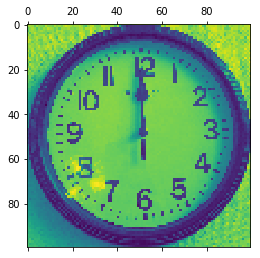

In [8]:
plt.matshow(imgs[0,:, : , 0])
# plt.show()

In [0]:
#transforms shape to a (720, 100, 100, 3) 4d tensor
dataset = []
dataset = np.concatenate([imgs, thetaH, thetaM], axis = -1)


In [10]:
print(dataset.shape)

(720, 100, 100, 3)


In [0]:
#sanity check of new 4d tensor
# print(z_input.shape)

In [0]:
# X_input = []
# X_input = np.concatenate([x_input, z_input], axis = 0)
# print(X_input.shape)

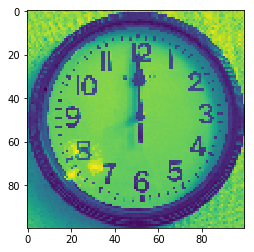

[[0.88235295 0.88235295 0.83529413 ... 0.85882354 0.90196079 0.88627452]
 [0.84313726 0.86274511 0.84705883 ... 0.89019608 0.89019608 0.9254902 ]
 [0.76078433 0.82745099 0.87843138 ... 0.86666667 0.89019608 0.87843138]
 ...
 [0.69411767 0.71764708 0.6901961  ... 0.80000001 0.82745099 0.8509804 ]
 [0.71372551 0.63921571 0.66274512 ... 0.79607844 0.74117649 0.79215688]
 [0.71764708 0.6901961  0.67450982 ... 0.80784315 0.77254903 0.7764706 ]]


In [13]:
#image and 0 - 1 values
plt.imshow(dataset[0,:,:,0])
plt.show()
print(dataset[0,:,:,0])

double checking length of the image after the resizing operation.

visualizing input in an array format.

printing length of image d after the resizing operation

In [0]:
from sklearn.utils import shuffle

dataset, target_dataset = shuffle(dataset, target_dataset)

In [15]:


k = 4
num_val_samples = 720 // k
num_scores = []

for i in range( k ):
  print( 'processing fold #', i )
  val_data = dataset[ ( i * num_val_samples ) :  (i + 1) * num_val_samples ]
  val_targets = target_dataset[ i * num_val_samples: (i + 1) * num_val_samples ]
  
  partial_train_data = np.concatenate(
    [ dataset[ :i * num_val_samples ],
     dataset[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )
  
  partial_train_targets = np.concatenate(
    [ target_dataset[ :i * num_val_samples ],
     target_dataset[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )

  
x_input = partial_train_data
y_output = partial_train_targets
x_val = val_data
y_val = val_targets
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
print( "x_input shape: ", x_input.shape )
print( "y_output shape: ", y_output.shape )
print( "x_val shape: ", x_val.shape )
print( "y_val shape: ", y_val.shape )

x_input shape:  (540, 100, 100, 3)
y_output shape:  (540, 12)
x_val shape:  (180, 100, 100, 3)
y_val shape:  (180, 12)


using k fold to boost sample as well as slice validation datasets

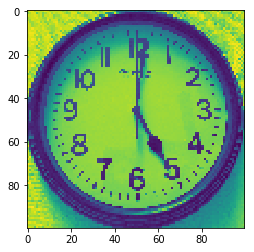

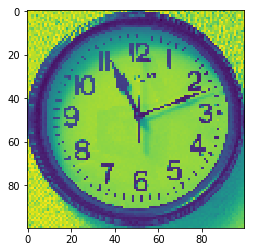

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[0.87843138 0.93725491 0.94509804 0.87450981 0.9137255 ]
 [0.80000001 0.85882354 0.92156863 0.92941177 0.74901962]
 [0.9137255  0.89803922 0.9137255  0.93333334 0.91764706]
 [0.84705883 0.89019608 0.90980393 0.9137255  0.94117647]
 [0.86666667 0.84313726 0.92156863 0.90588236 0.89411765]]
[[0.89411765 0.89019608 0.95686275 0.83529413 0.9254902 ]
 [0.93333334 0.90980393 0.9254902  0.9137255  0.89803922]
 [0.91764706 0.92156863 0.78823531 0.90980393 0.66274512]
 [0.9137255  0.94509804 0.83137256 0.94117647 0.84313726]
 [0.89411765 0.94509804 0.92156863 0.9254902  0.87058824]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
len(image_analog)
plt.imshow(x_input[0, :, :, 0])
plt.show()
plt.imshow(x_val[0, :, :, 0])
plt.show()
print(y_val[0])
print(x_input[0, :5, :5, 0])
print(x_val[0, :5, :5, 0])
print(y_val[0])
print(y_val[100])

This is the k folding snippet we'll use to get our split our training and validation data.

Sanity test for the files.

In [0]:

def residual_unit( inputs, filters, kernel, drop_out = 0.0, pooling = False ):
  res = inputs
  
  if pooling == True:
    res = Conv2D( filters, kernel_size = 1, strides = ( 2, 2) )( res )
    inputs = MaxPooling2D( pool_size = ( 2, 2 ) )(inputs)
    
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  inputs = Dropout( drop_out )( inputs )
  
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  
  inputs = keras.layers.add( [ inputs, res ] )
  
  return inputs



This is the residual unit function. The default parameters allows pooling and dropout.

In [19]:

input_shape = Input( shape = x_input[ 0, :, :, :].shape )

inputs = input_shape

inputs = Conv2D( 16, 3, padding = 'same' )( inputs )
inputs = residual_unit( inputs, 16, 3 )

inputs = residual_unit( inputs, 32, 3, 0.3, True )
inputs = residual_unit( inputs, 32, 3 )

inputs = residual_unit( inputs, 64, 3, 0.3, True )
inputs = residual_unit( inputs, 64, 3 )

inputs = BatchNormalization()( inputs )
inputs = Conv2D( 128, 3 )( inputs )
inputs = Activation( "relu" )( inputs )

inputs = Flatten()( inputs )
inputs = Dense( 128 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 64 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 32 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 12 )( inputs )
prediction = Activation( "softmax" )( inputs )
model = Model( input_shape, prediction )


a = keras.callbacks.ModelCheckpoint( filepath='/content/drive/My Drive/my_clock_ai_v0.1.h5', monitor='val_acc', save_best_only=True )
b = keras.callbacks.EarlyStopping( monitor = 'val_acc', patience = 100 )

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit( x_input , y_output, epochs=1000, batch_size = 200, 
              callbacks = [ a, b ], validation_data = ( x_val, y_val ) )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 540 samples, validate on 180 samples
Epoch 1/1000
540/540 [==============================] - 9s 17ms/step - loss: 2.6206 - acc: 0.0926 - val_loss: 2.5820 - val_acc: 0.0556
Epoch 2/1000
540/540 [==============================] - 1s 2ms/step - loss: 2.5006 - acc: 0.0926 - val_loss: 2.5289 - val_acc: 0.0556
Epoch 3/1000
540/540 [==============================] - 1s 1ms/step - loss: 2.4635 - acc: 0.0926 - val_loss: 2.4879 - val_acc: 0.0556
Epoch 4/1000
540/540 [==============================] - 1s 1ms/step - loss: 2.4223 - acc: 0.0926 - val_loss: 2.4752 - val_acc: 0.0556
Epoch 5/1000
540/540 [==============================] - 1s 1ms/step - loss: 2.3918 - acc: 0.0926 - val_loss: 2.4361 - val_acc: 0.0556
Epoch 6/1000
540/540 [==========================

#first run with no dropout and got a flat validation acc curve. Moved dropout to 30%.
#second run, double filter sizes and up batch size to 128 from 100. fell flat no learning
#reverted to first filter sizes and dropped to 20% dropout and kept batch size at 128
#halved the conv2d layers and lowered batch size to 75. runs faster and train is getting better, val is staying flat.
#changed the dropout to 30%. Val_acc is still flat, not gaining.
#trying the removal of 3 res_net layers to see if a smaller model works better. Training skyrocketed in acc. Val remains pretty flat still.
#removed the 50 filter Dense Layer to see if an even smaller layer will improve training and val acc. Forgot to reset runtimes and train acc hit 100%
#reset runtimes and validation is still running flat.

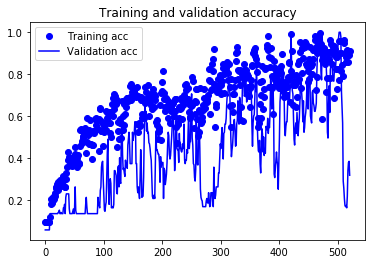

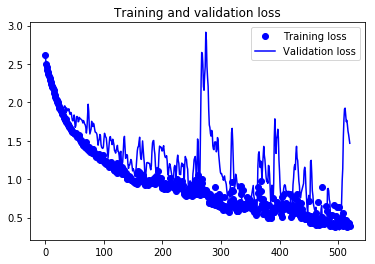

In [22]:

acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range( len( acc ) )
plt.plot( epochs, acc, 'bo', label='Training acc' )
plt.plot( epochs, val_acc, 'b', label='Validation acc' )
plt.title( 'Training and validation accuracy' )
plt.legend()

plt.figure()

plt.plot( epochs, loss, 'bo', label='Training loss' )
plt.plot( epochs, val_loss, 'b', label='Validation loss' )
plt.title( 'Training and validation loss' )
plt.legend()

plt.show()

In [0]:
model_demo = load_model( '/content/drive/My Drive/my_clock_ai_v0.1.h5' )

Loading the demo weights.

In [0]:
score = model_demo.evaluate( x_val, y_val )
print( "\n%s: %.2f%%" % ( model_demo.metrics_names[1], score[1]*100 ) )

Outputting the evaluation performance.

Gameplan is to use polar coordinates in order to give an additional feature to the learning model during training.

Initially considered using pixels to calculate theta since arctan( y / x ) will give us the angle of the clock hand.
However, since the pixels were blurry compounded by the fact that the conditions to make theta happen is complex, an alternative was considered.

Rather than use X and Y to calculate theta, the idea is then to use degree of 360 and divide by units of 60 ( which represent the minutes ). This gives us 6 degrees of movement per ***"minute"***.

For the ***"Hour"*** hand we know that the hand moves 5 minute units to move to the next hour. 5 * 6 gives us 30 degrees per hour, so if we take 30 degree /60 minutes we get 0.5 degrees/minute.

Same idea will be applied to the hour-hand cause this would be the one that gives the model problem since the hour-hand moves as the minute hand moves and makes things a little harder to do for the hour identification.

( 4/29/19 )

*added k folding so we can get our training and validation split accordingly for the small sample size

*added residual unit function which will allow us to make residual units with dropout and pooling capabilities

*added annotation function which will generate the other portion of input the network will be using to learn

*Data generator has been added but hasn't been customized to work with this problem

